In [1]:
import matplotlib
matplotlib.use("Agg")
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy
import statsmodels as sm

import seaborn as sns

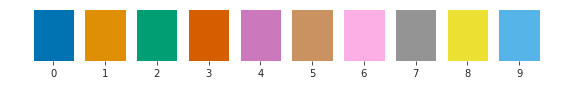

In [2]:
def draw_palette(colors):
    plt.figure(figsize=(len(colors),1))
    with sns.axes_style('ticks'):
        plt.bar(range(len(colors)), color=colors, height=0.5)
        plt.box(False)
        plt.xticks(range(len(colors)))
        plt.yticks([])
draw_palette(sns.color_palette('colorblind'))

In [3]:
palette = sns.color_palette('colorblind')

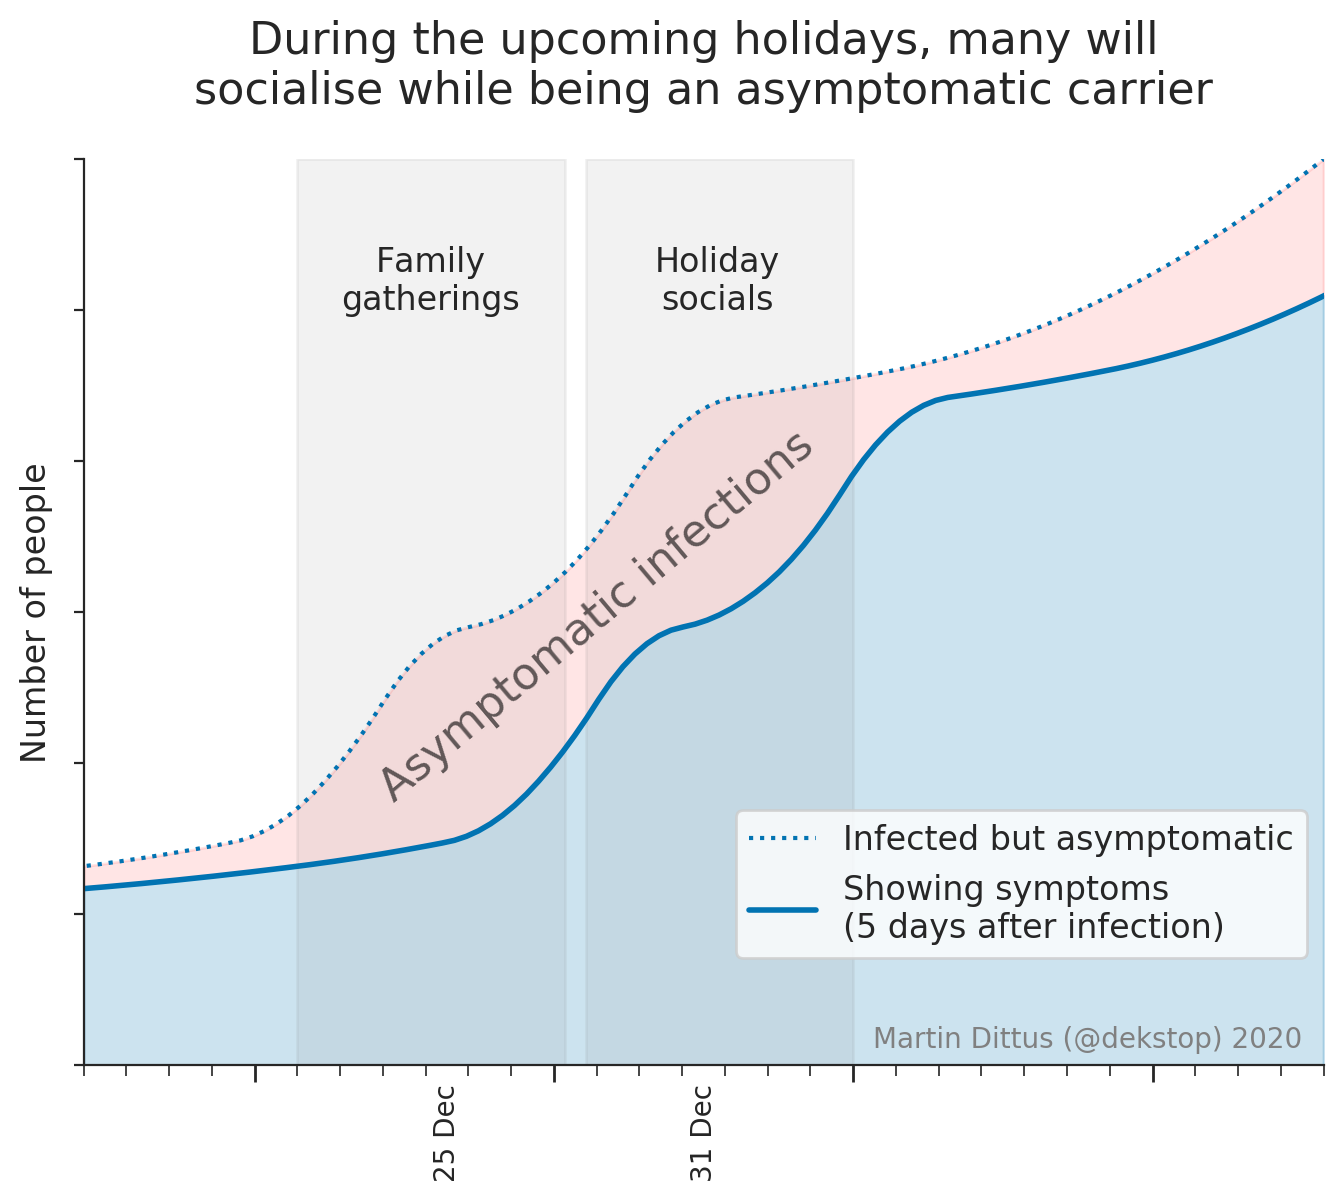

In [60]:
plt.figure(figsize=(8,6), dpi=200)
# plt.subplots_adjust(0.2,0.2,0.8,0.9)
# plt.subplot(1,1,1)
points = [
      (-10, 170),
    (1, 200),
#       (10, 200),
      (15, 250),

    (19, 280),
    (22, 340),
    (23, 400),
    (25, 550),

    (27, 600),
    (29, 700),
    (30.5, 820),
      (31 + 3, 900),
      (31 + 7, 950),
      (31 + 15, 1200),
]

# range shown
xmin = 24 - 7
xmax = 31 + 15

onset_delay = 5
intp_num = 200

with sns.axes_style('ticks'):
    
    plt.axvspan(22, 28.25, color='grey', alpha=0.1)
    plt.text(25.125, 1000, 'Family\ngatherings', horizontalalignment='center', size=12)
    plt.axvspan(28.75, 31+4, color='grey', alpha=0.1)
    plt.text(31.825, 1000, 'Holiday\nsocials', horizontalalignment='center', size=12)
    
    x, y = zip(*points)
#     plt.plot(x, y, 'x')

    # infections
    fi = scipy.interpolate.interp1d(x, y, kind=2)
    ix = np.linspace(min(x), max(x), num=intp_num, endpoint=True)
    iy = fi(ix)
    plt.plot(ix, iy, ':', color=palette[0])

    # symptoms
    plt.plot(ix+onset_delay, iy, '-', color=palette[0], linewidth=2)
    
    # awareness gap
    ixr = np.linspace(xmin, xmax, num=intp_num)
    plt.gca().fill_between(ixr, fi(ixr), fi(ixr-onset_delay), color='red', alpha='0.1')
    plt.text(29, 350, 'Asymptomatic infections', color='black', alpha=0.6,
             horizontalalignment='center', size=16, 
             rotation=40)
    
    # symptoms fill
    plt.gca().fill_between(ixr, 0, fi(ixr-onset_delay), 
                           color=matplotlib.colors.rgb2hex(palette[0]), alpha='0.2')
    
    # legend
    plt.legend(loc='lower right', bbox_to_anchor=(0, 0.1, 1, 1), handles=[
        matplotlib.lines.Line2D([], [], color=palette[0], linestyle=':', label='Infected but asymptomatic'),
        matplotlib.lines.Line2D([], [], color=palette[0], linestyle='-', linewidth=2, label='Showing symptoms\n(%d days after infection)' % onset_delay),
    ], fontsize=12)

    
    # credits
    plt.text(xmax-.5, 15, 'Martin Dittus (@dekstop) 2020', color='grey',
             horizontalalignment='right', verticalalignment='bottom', size=10, 
             rotation=0)

    # axes etc
#     plt.xticks([10, 17, 24, 31, 31+7, 31+14], labels=['','','24. Dec', '31. Dec','7. Jan',''], size=12)
    plt.xticks(range(xmin, xmax), labels=[])
    plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(7))
#     plt.gca().xaxis.set_major_locator(matplotlib.ticker.FixedLocator([
#         12, 13, 14,
#         19, 20, 21,
#         26, 27, 28,
#         31+2, 31+3, 31+4,
#         31+9, 31+10, 31+11,
#         31+16, 31+17, 31+18,
#         ]))
    plt.gca().xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
#     plt.gca().tick_params(axis='x', which='major', width=1.)
    plt.gca().tick_params(axis='x', which='major', length=6, width=1)
    plt.gca().tick_params(axis='x', which='minor', length=4)#, color='#888888')
    plt.text(25.5, -25, '25 Dec', size=10, rotation=90, ha='center', va='top')
    plt.text(31.5, -25, '31 Dec', size=10, rotation=90, ha='center', va='top')
    
    plt.gca().set_yticklabels([])
    
    plt.xlim(xmin, xmax)
    plt.ylim(0, 1200)
    
    plt.ylabel('Number of people', size=12)
    
    plt.title('During the upcoming holidays, many will\nsocialise while being an asymptomatic carrier',
             size=16, pad=20)
    
    sns.despine()

plt.savefig('2020 covid holiday spread.png', bbox_inches='tight')
plt.savefig('2020 covid holiday spread.pdf', bbox_inches='tight')